# GRADIENT DESCENT

## <FONT COLOR="BLUE">MACHINE LEARNING & DEEP LEARNING -  GRADIENT DESCENT

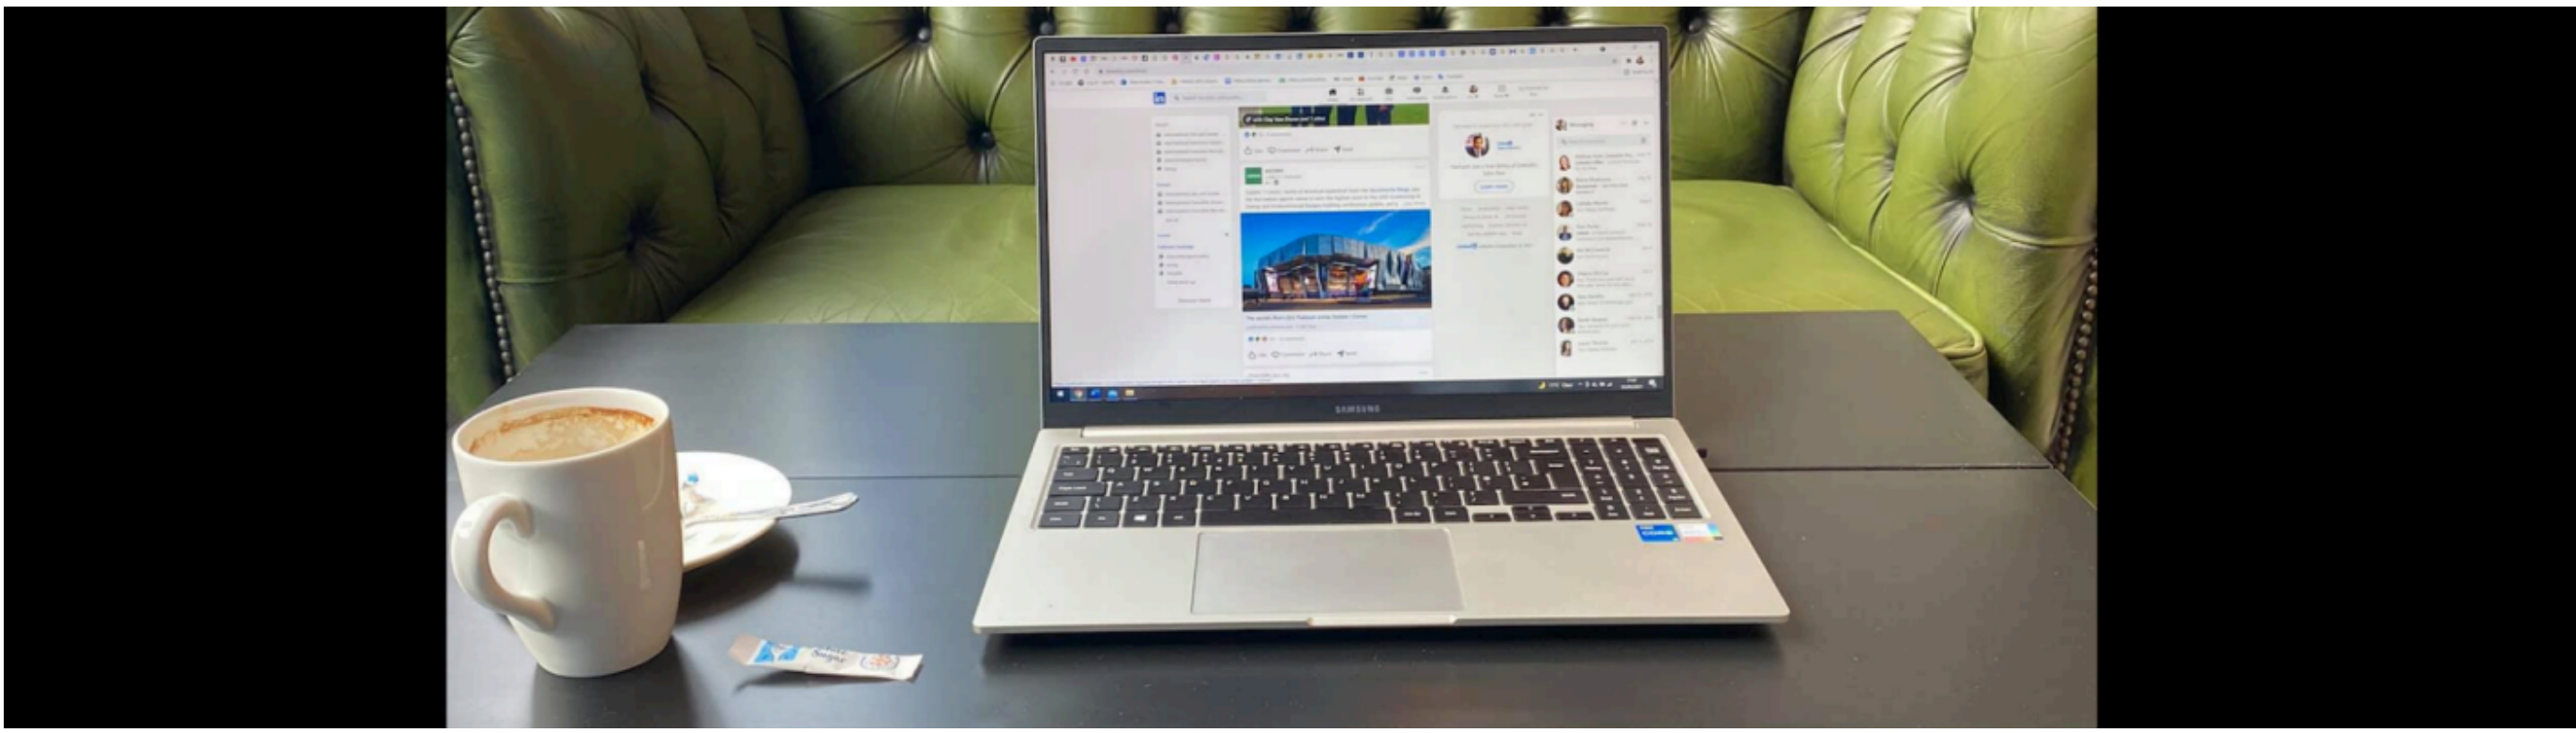

## HEMANT THAPA

In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation
import statistics as st
import yfinance as yf
import tensorflow as tf
import PIL
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers 
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [3]:
class stock:
    def __init__(self, ticker, time):
        self.ticker = ticker
        self.time = time
        
    def chart(self):
        return yf.download(self.ticker, period=self.time)

## DATASET

In [4]:
df = pd.read_csv('advertising.csv')

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## STANDARD SCALE

In [7]:
class StandardScale:
    def __init__ (self, data):
        self.data = data
    
    def scale_fit(self):
        return (self.data - self.data.mean())/self.data.std()

In [8]:
data = StandardScale(df).scale_fit()

In [9]:
data[:10]

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143
5,-1.611365,1.726701,2.040809,-1.307629
6,-1.042960,0.642293,-0.323896,-0.425974
7,-0.312652,-0.246787,-0.870303,-0.157644
8,-1.612530,-1.425491,-1.357019,-1.767624
9,0.614501,-1.391814,-0.429504,-0.655971


In [10]:
model = LinearRegression()

In [11]:
model

LinearRegression()

In [12]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [14]:
model.fit(X_train, y_train)

LinearRegression()

## INTERCEPTION

In [15]:
model.intercept_

0.0555118748368465

## COEFFICIENT 

In [16]:
model.coef_

array([0.85978168])

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([ 0.39357417,  1.12462794,  0.7210462 , -0.05306964, -0.738057  ,
       -1.16066617,  0.08212524,  0.9603912 ,  1.38900902, -1.04750305,
       -0.68197617,  1.2387925 , -0.15822121,  0.6819899 , -0.66294874,
        0.98542729, -0.72603968, -0.85422445, -0.6689574 , -0.47367591,
        0.86925984, -1.29986681,  0.96840275, -0.61387801,  0.77011693,
       -1.33892311,  0.51775317, -0.91631395, -0.84120568,  1.01847492,
        1.55124287, -1.02146552,  0.98743017,  1.3539585 , -1.14163874,
       -0.1211678 ,  0.69400722,  0.77111837, -0.20528905,  0.46467666,
        0.58384844, -0.00199602, -1.33291445,  0.05809059,  0.61088741,
       -1.24478742,  0.84422375, -0.44062828,  0.35551932,  0.46968388,
        1.49416059,  1.51619235,  0.98442584,  0.56181668, -0.020022  ,
       -0.06308407, -0.7931364 , -0.0981346 , -0.24334391, -0.54377696])

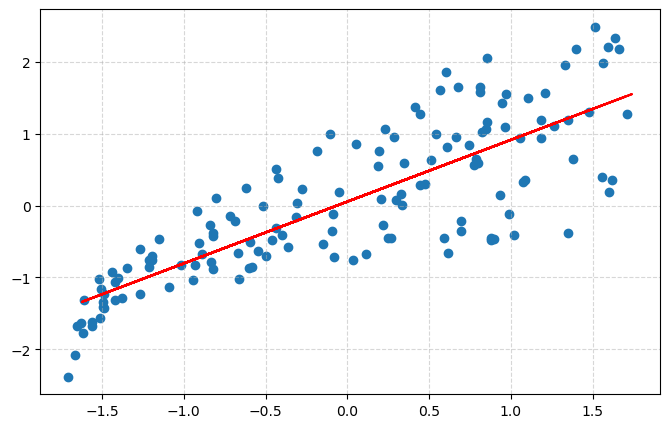

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color="red")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
r_square = r2_score(y_test, y_pred)
r_square

0.3555069043076414

In [22]:
mean_absolute_error(y_test, y_pred)

0.5163043150308126

In [23]:
 mean_squared_error(y_test, y_pred)

0.46370170954834583

In [24]:
root_mean_square_error = math.sqrt(mean_squared_error(y_test, y_pred))
root_mean_square_error

0.6809564667057255

In [25]:
data = StandardScale(df).scale_fit()

In [26]:
data[:5]

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [27]:
X = data['TV']
y = data['Sales']

## GRADIENT DESCENT

In [28]:
class GradientDescent:
    def __init__(self, x, y, m_curr=0, c_curr=0, iteration=100, rate=0.01):
        self.x = x
        self.y = y
        self.predicted_y = (m_curr * x) + c_curr  # Initialize predicted_y using initial slope and intercept
        self.m_curr = m_curr
        self.c_curr = c_curr
        self.iteration = iteration
        self.rate = rate

    def cost_function(self):
        N = len(self.y)
         #mean squared error
        return sum((self.y - self.predicted_y) ** 2) / N
    
    def calculation(self):
        N = float(len(self.y))
        gradient_descent = pd.DataFrame(columns=['m_curr', 'c_curr', 'cost'])
        # Perform gradient descent iterations
        for i in range(self.iteration):
            # Calculate the predicted y values using current slope and intercept
            self.predicted_y = (self.m_curr * self.x) + self.c_curr
            cost = self.cost_function()
             # Calculate gradients for slope (m_grad) and intercept (c_grad)
            m_gradient = -(2/N) * np.sum(self.x * (self.y - self.predicted_y))
            c_gradient = -(2/N) * np.sum(self.y - self.predicted_y)
            # Update the slope and intercept using gradient and learning rate
            self.m_curr -= self.rate * m_gradient
            self.c_curr -= self.rate * c_gradient
            
            gradient_descent.loc[i] = [self.m_curr, self.c_curr, cost]
            
        return gradient_descent


In [29]:
gd = GradientDescent(X, y)
gradient_descent_result = gd.calculation()

## GRADIENT DESCENT

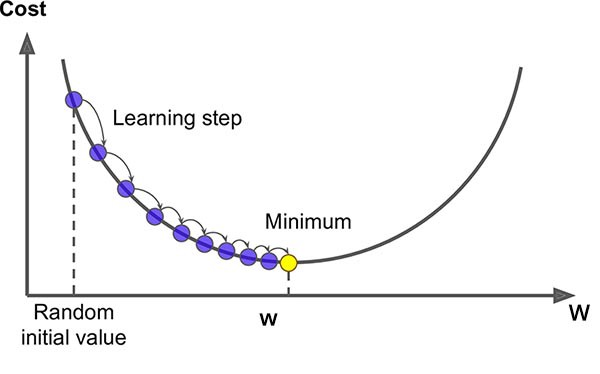

In [86]:
gradient_descent_result[:10]

,index,m_curr,c_curr,cost
0,0,0.015566,-3.641532e-18,0.995000
1,1,0.030823,-7.283063e-18,0.971010
2,2,0.045776,-1.021405e-17,0.947966
3,3,0.060431,-1.412204e-17,0.925829
4,4,0.074795,-1.749711e-17,0.904565
5,5,0.088873,-2.096101e-17,0.884139
6,6,0.102670,-2.380318e-17,0.864517
7,7,0.116193,-2.708944e-17,0.845669
8,8,0.129447,-3.081979e-17,0.827564
9,9,0.142438,-3.428369e-17,0.810172


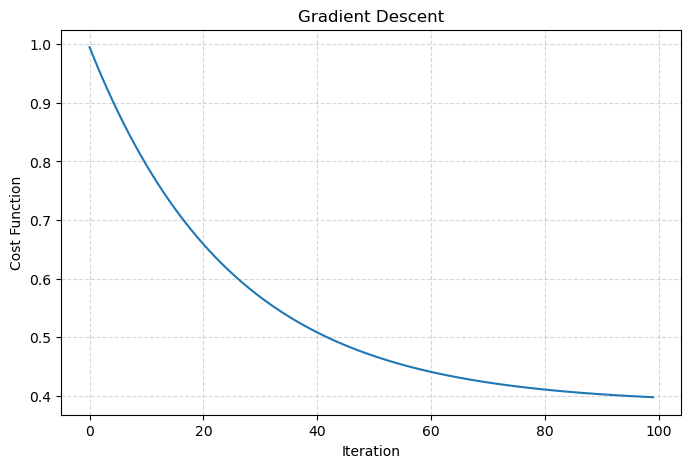

In [31]:
plt.figure(figsize=(8,5))
gradient_descent_result.cost.plot()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Gradient Descent')
plt.show()

In [32]:
gradient_descent_result.reset_index(inplace=True)

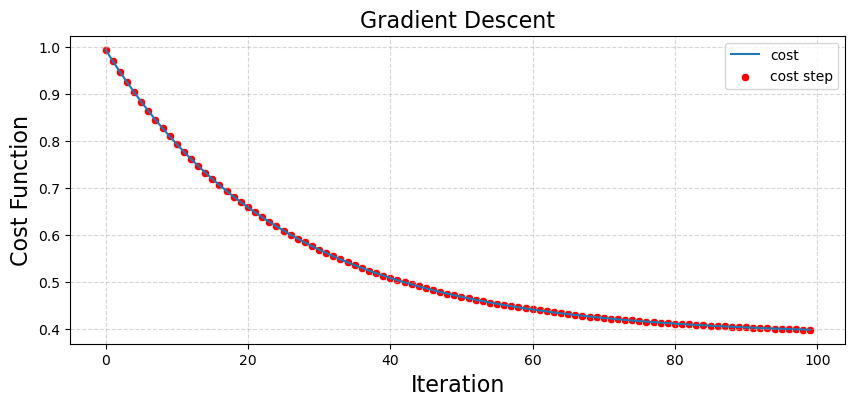

In [33]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=gradient_descent_result, x='index', y='cost', label="cost")
sns.scatterplot(data=gradient_descent_result, x='index', y='cost', color="red", label="cost step")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost Function', fontsize=16)
plt.title('Gradient Descent', fontsize=16)
plt.show()

## MACHINE LEARNING

In [34]:
jp = stock("JPM", "2y").chart()
gs = stock("GS", "2y").chart()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
X = jp.Close.values.reshape(-1,1)
y = gs.Close.values

In [36]:
print(X.shape)

(504, 1)


In [37]:
print(y.shape)

(504,)


In [38]:
y = y[:2519]
print(y.shape)

(504,)


In [39]:
X_train, X_test_sklearn, y_train, y_test_sklearn = train_test_split(X,y, test_size=0.2)

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred_sklearn = model.predict(X_test_sklearn)

In [43]:
y_pred_sklearn

array([352.0924166 , 346.06920685, 375.589432  , 341.46320992,
       334.94072822, 337.2437144 , 334.94072822, 354.04111801,
       313.87554099, 386.10591729, 378.58494084, 379.26134289,
       356.6823175 , 372.78719844, 400.45537212, 361.43325246,
       336.69615435, 368.93813288, 347.03548496, 311.00887415,
       340.86731261, 358.26058895, 395.52728248, 292.18226439,
       383.25537106, 385.81604123, 345.85983554, 332.20290337,
       354.86245809, 332.87930543, 354.89467473, 328.43435484,
       352.75272262, 308.48040833, 397.52429656, 349.32237511,
       384.14114443, 355.00739612, 353.88005937, 323.95718762,
       392.78945763, 384.60817516, 334.26432617, 349.98268113,
       396.25199721, 318.72310131, 312.3294739 , 351.89916589,
       376.58795133, 312.95756327, 384.89805122, 350.94898381,
       390.00332011, 334.84410287, 359.33961302, 307.25643394,
       315.85643447, 339.70775922, 332.29952873, 374.86471727,
       396.34862256, 345.2639628 , 324.89127366, 395.96

## CORRELATION ANALYSIS BETWEEN JP MORGAN AND GOLDMAN SACHS

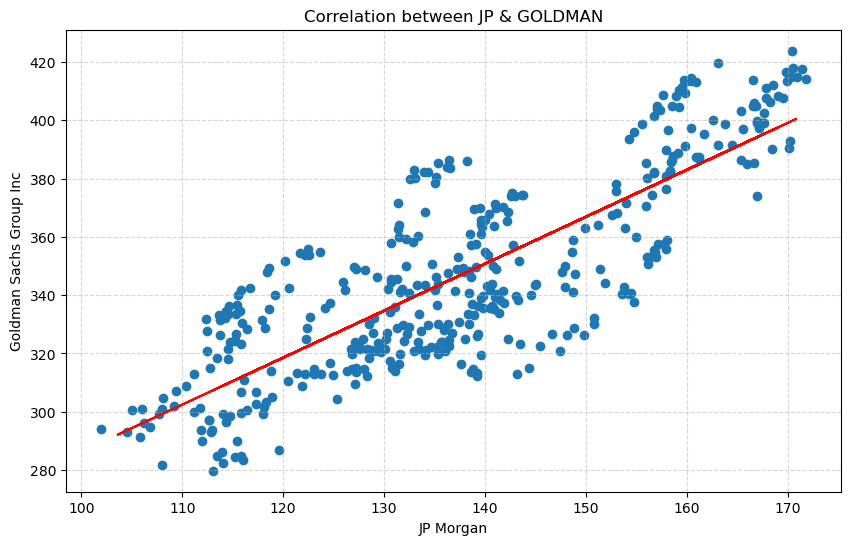

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_test_sklearn, y_pred_sklearn, color="red")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("JP Morgan")
plt.ylabel("Goldman Sachs Group Inc")
plt.title("Correlation between JP & GOLDMAN")
plt.show()

In [45]:
r_square = r2_score(y_test, y_pred)

In [46]:
r_square

0.3555069043076414

In [47]:
mse = mean_absolute_error(y_test, y_pred)

In [48]:
mse

0.5163043150308126

## DEEP LEARNING (NEURAL NETWORK)

In [49]:
jp = stock("JPM", "2y").chart()
gs = stock("GS", "2y").chart()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [50]:
x = jp.Close.values.reshape(-1,1)
y = gs.Close.values

In [51]:
X_train_temp, X_test_tf, y_train_temp, y_test_tf = train_test_split(x, y, test_size=0.2, random_state=42)
X_train_tf, X_val, y_train_tf, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tf.reshape(-1, 1))
X_val_scaled = scaler.transform(X_val.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test_tf.reshape(-1, 1))

In [53]:
model = Sequential([
    Dense(units=1, input_shape=(1,), activation='linear', use_bias=True)
])

In [54]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [55]:
history = model.fit(X_train_scaled, y_train_tf, validation_data=(X_val_scaled, y_val), epochs=100, verbose=0)

In [56]:
y_pred_tf = model.predict(X_train_scaled)
y_pred_tf[:5]

11/11 [==============================] - 0s 1ms/step


array([[308.8027 ],
       [396.50256],
       [345.36423],
       [311.39944],
       [397.13977]], dtype=float32)

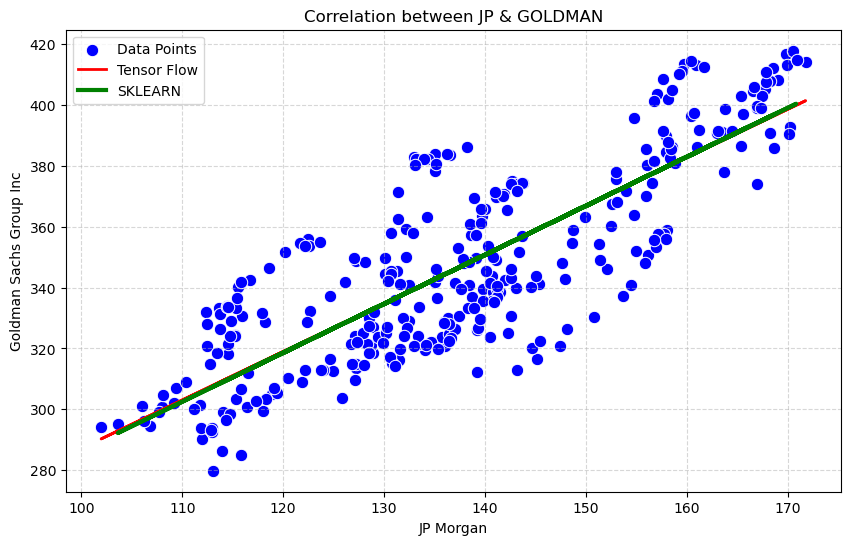

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tf[:, 0], y=y_train_tf, color='blue', label='Data Points', s=80)
plt.plot(X_train_tf, y_pred_tf, color='red', label='Tensor Flow', linewidth=2)
plt.plot(X_test_sklearn, y_pred_sklearn, color="green", label="SKLEARN", linewidth=3)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("JP Morgan")
plt.ylabel("Goldman Sachs Group Inc")
plt.title("Correlation between JP & GOLDMAN")
plt.legend()
plt.show()

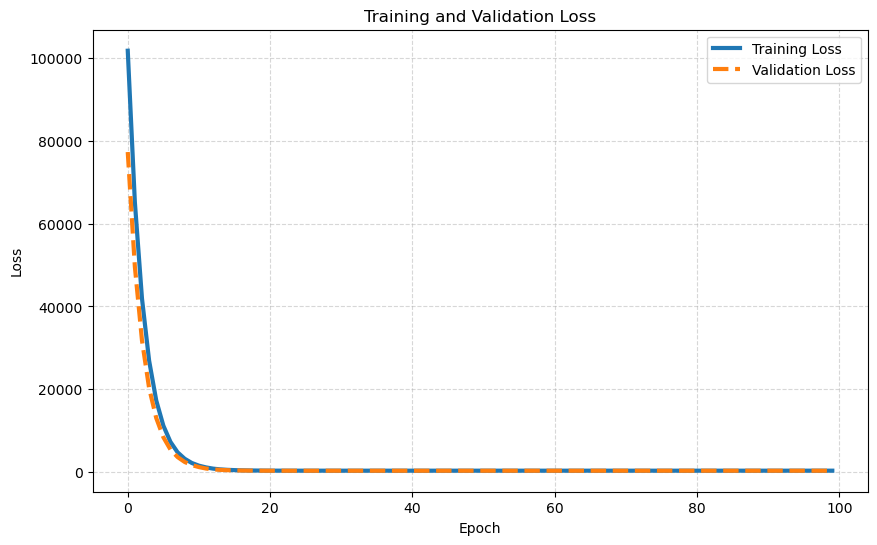

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=3)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=3, linestyle="--")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## SOLVING MANUAL (LINEAR PROGRAMMING)

In [59]:
X = stock("JPM", "2y").chart()
Y = stock("GS", "2y").chart()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:
x = X.Close.values
y = Y.Close.values

In [61]:
print(x.shape)
print(y.shape)

(504,)
(504,)


In [62]:
dataset = { "x":x,
           "y":y
}

In [63]:
df = pd.DataFrame(dataset)
df[:5]

,x,y
0,158.929993,408.350006
1,157.009995,404.970001
2,155.580002,398.799988
3,154.279999,393.570007
4,154.720001,395.869995


In [64]:
print(f"X Mean: {st.mean(df['x'])}")
print(f"y Mean: {st.mean(df['y'])}")

X Mean: 138.56630962614028
y Mean: 347.76799610682895


## TOTAL SUM OF SQUARE (SST)

In [65]:
y_mean = sum(df['y'])/len(df['y'])
x_mean = sum(df['x'])/len(df['x'])
sst = sum([(y - y_mean)**2 for y in df['y']])
print(f'Total Sum of Square: {sst}')

Total Sum of Square: 557669.3792610682


In [66]:
df['xi - x mean'] = df['x'] - x_mean
df['yi - y mean'] = df['y'] - y_mean
df['(xi - x mean)(yi - y mean)'] = df['xi - x mean'] * df['yi - y mean']
df['(xi - x mean)**2'] = df['xi - x mean'] * df['xi - x mean']

In [67]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2
0,158.929993,408.350006,20.363683,60.582010,1233.672850,414.679587
1,157.009995,404.970001,18.443685,57.202005,1055.015757,340.169512
2,155.580002,398.799988,17.013692,51.031992,868.242599,289.465722
3,154.279999,393.570007,15.713689,45.802011,719.718567,246.920027
4,154.720001,395.869995,16.153692,48.101999,777.024857,260.941752


In [68]:
b1 = sum(df['(xi - x mean)(yi - y mean)'])/sum(df['(xi - x mean)**2'])
b1

1.5913277888613993

In [69]:
bo = y_mean - b1 * x_mean
bo

127.26357699877912

In [70]:
x_value = df['x']
x_value = x_value.tolist()
x_value[:5]

[158.92999267578125,
 157.00999450683594,
 155.5800018310547,
 154.27999877929688,
 154.72000122070312]

In [71]:
predicted_values = [] 

for i in x_value:
    y = bo + b1 * i
    predicted_values.append(y)  

## SUM OF SQUARE OF RESIDUAL (SSE)

In [72]:
df['y predicted'] = predicted_values
df['Residual'] = df['y'] - df['y predicted']

In [73]:
sse = sum((df['Residual'])* df['Residual'])
print(f'Sum of Square Residual Error: {sse}')

Sum of Square Residual Error: 180966.65976355155


In [74]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual
0,158.929993,408.350006,20.363683,60.582010,1233.672850,414.679587,380.173291,28.176715
1,157.009995,404.970001,18.443685,57.202005,1055.015757,340.169512,377.117944,27.852057
2,155.580002,398.799988,17.013692,51.031992,868.242599,289.465722,374.842357,23.957630
3,154.279999,393.570007,15.713689,45.802011,719.718567,246.920027,372.773626,20.796381
4,154.720001,395.869995,16.153692,48.101999,777.024857,260.941752,373.473814,22.396181


## SUM OF SQUARE REGRESSION (SSR)

In [75]:
df['(y pred - y mean)**2'] = (df['y predicted'] - y_mean)**2
ssr = sum(df['(y pred - y mean)**2'])
print(f'Total Sum of Square Regression: {ssr}')

Total Sum of Square Regression: 376702.7194975189


## R SQUARE

In [76]:
r_square = ssr/sst
f"R square: {r_square}"

'R square: 0.6754947169533738'

In [77]:
r_square = 1 - sse/sst
f"R square: {r_square}"

'R square: 0.6754947169533697'

## MEAN SQUARE ERROR

In [78]:
n = len(df['x'])
mse = 1/n * sum((df['y'] - df['y predicted']) * (df['y'] - df['y predicted']))
print(f"Mean Square Error: {mse}")

Mean Square Error: 359.06083286418954


## ROOT MEAN SQUARE ERROR

In [79]:
rmse = math.sqrt(mse)
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 18.948900571383806


## PEARSON CORRELATION

In [80]:
df['x square'] = df['x'] * df['x']
df['y square'] = df['y'] * df['y']
df['xy'] = df['x'] * df['y']

In [81]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual,(y pred - y mean)**2,x square,y square,xy
0,158.929993,408.350006,20.363683,60.582010,1233.672850,414.679587,380.173291,28.176715,1050.103126,25258.742572,166749.727485,64899.063479
1,157.009995,404.970001,18.443685,57.202005,1055.015757,340.169512,377.117944,27.852057,861.419464,24652.138375,164000.701889,63584.337667
2,155.580002,398.799988,17.013692,51.031992,868.242599,289.465722,374.842357,23.957630,733.021034,24205.136970,159041.430264,62045.302831
3,154.279999,393.570007,15.713689,45.802011,719.718567,246.920027,372.773626,20.796381,625.281542,23802.318023,154897.350665,60719.980250
4,154.720001,395.869995,16.153692,48.101999,777.024857,260.941752,373.473814,22.396181,660.789096,23938.278778,156713.053034,61249.006128


In [82]:
sum_of_product = sum(df['xy']) - (sum(df['x']) * sum(df['y'])) / len(df['x'])
sum_of_square_of_first_variable = sum(df['x square']) - (sum(df['x'])**2) / len(df['x'])
sum_of_square_of_second_variable = sum(df['y square']) - (sum(df['y'])**2) / len(df['y'])

In [83]:
pearson = sum_of_product / (math.sqrt(sum_of_square_of_first_variable * sum_of_square_of_second_variable))
print(f"Pearson Correlation: {pearson}")

Pearson Correlation: 0.8218848562625816


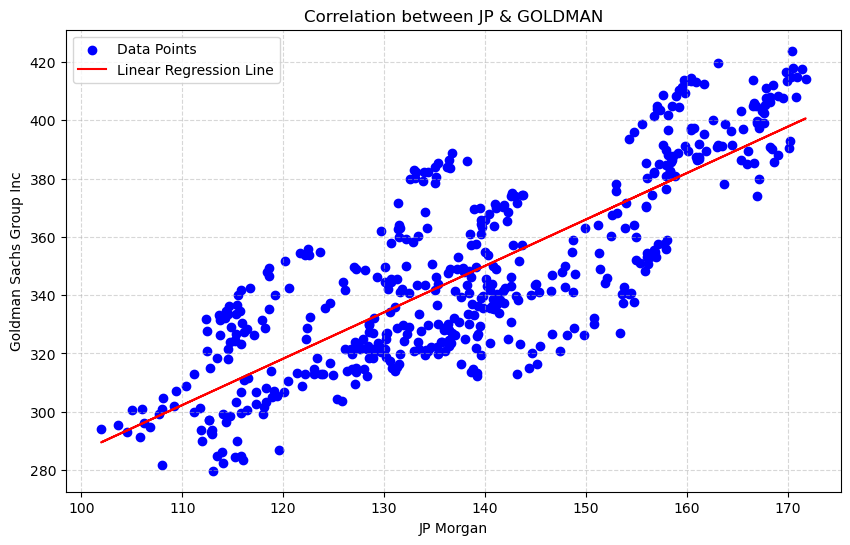

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='blue', label='Data Points')
plt.plot(df['x'], df['y predicted'], color='red', label='Linear Regression Line')
plt.xlabel("JP Morgan")
plt.ylabel("Goldman Sachs Group Inc")
plt.title("Correlation between JP & GOLDMAN")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

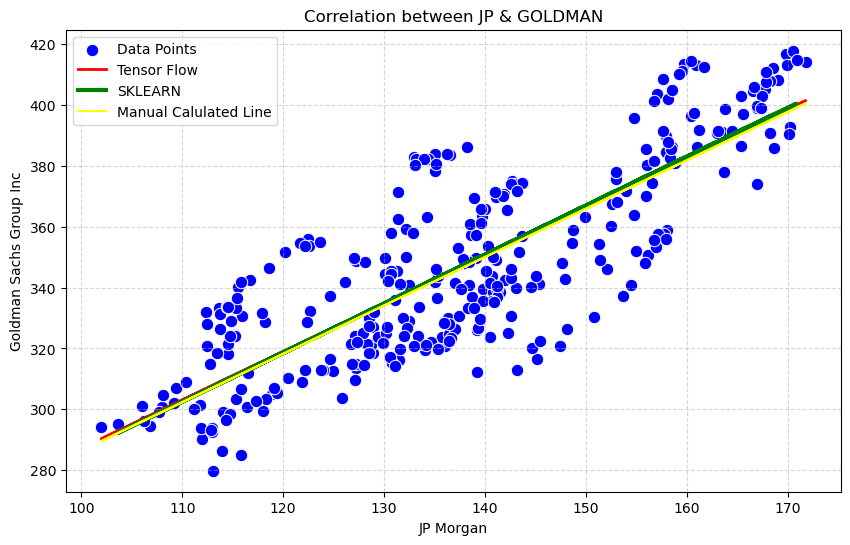

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tf[:, 0], y=y_train_tf, color='blue', label='Data Points', s=80)
plt.plot(X_train_tf, y_pred_tf, color='red', label='Tensor Flow', linewidth=2)
plt.plot(X_test_sklearn, y_pred_sklearn, color="green", label="SKLEARN", linewidth=3)
plt.plot(df['x'], df['y predicted'], color='yellow', label='Manual Calulated Line')
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("JP Morgan")
plt.ylabel("Goldman Sachs Group Inc")
plt.title("Correlation between JP & GOLDMAN")
plt.legend()
plt.show()

## REFRENCES:
    
D. Kass. (2021). Gradient Descent with Linear Regression from Scratch. Retrieved from: 
https://dmitrijskass.netlify.app/2021/04/03/gradient-descent-with-linear-regression-from-scratch/

S. Sayad. Machine Learning Recipes. Retrieved from: http://saedsayad.com/mlr.htm